
# Data Management and Database Design INFO 6210 :: Portfolio（SQL）

## Basic knowleadge

###  What's a Relational Database?

####  A relational database is a database been created based on the relational model，there must be relationships connect entities together.
#### In the database, we store datas in one table per entity(person, place，etc.) Each table contains multiple rows as its attribute(like name,gender in one person)and each table has an identifier as well which we call it primary key  ,in the way of  a composite key or a single key--composite means it's a combination of multiple attributes(we can use LastName and FirstName to identify a certain person,so LastName and FirstName pair makes a composite key).
#### Besides,since we are talking about relational, there's relationships invole every table.e.g.,a person may own a phone,that means there's one relationship between person and phone,we can use attribute of "id" from phone to put it in the person table indicate this certain person owns the certain phone with the certain id,now the "id" in person table is a forreign key because we can refer to a certain phone with this id.Foreign key is important in relational database because this is the key represent the "relationships" and used for match other tables.

## Design pattern
### How do I design the database?
#### After you choose a domain of your database ,next step is to clarify all tables and relationships
#### So here comes another part---relationship mapping and the normal form
#### In our project ,we choosed the domain of 2018 winter Olympics in Pyeongchang,we need all below informations:atheletes information,countries,area which  each country belongs to,events,medal boards .Besides these entities mentioned aforesaid,we aims to analyze the social media based on this domain,hence we derived other tables like tags and posts from some social medias like twitter.
#### Normally,it's easy to figure out this relationship,so let's start mapping them.There's four important relationship mapping pattern in relational database:one-to-one,many-to-many-,many-to-one,one-to-many.They are all easy understanding as their literal meaning:one certain athelete must belong to a certain country,but one country has many atheletes.That is an athelete and a country subject to many-to-one relationship,so in athelete table there must be one attribute indicate the nationality,here we just use the abbrievation of country name:

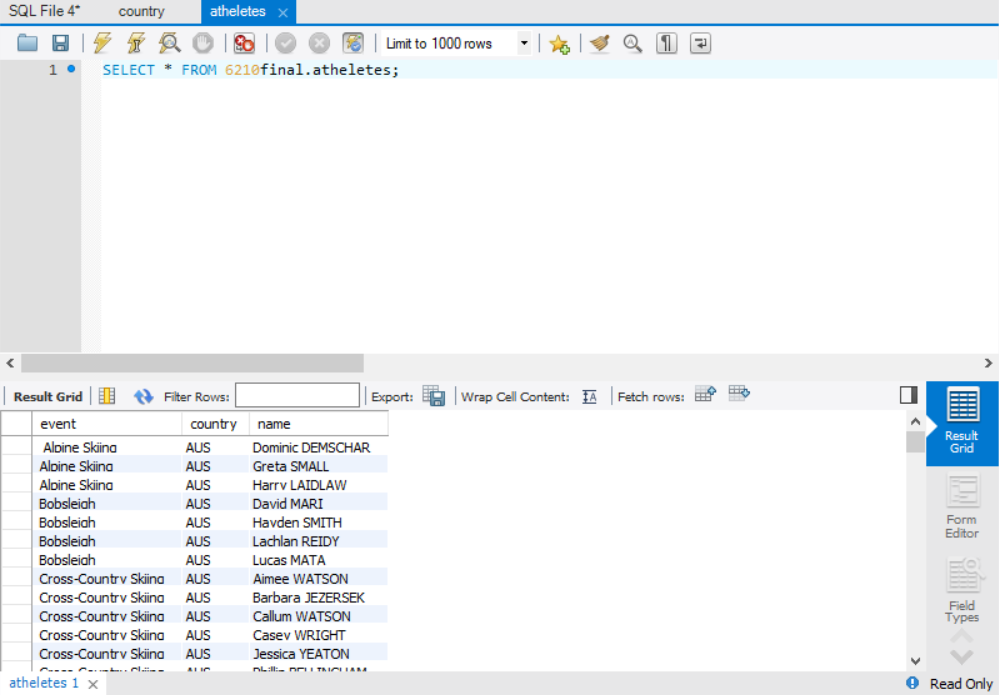

In [2]:
from IPython.display import Image
Image(filename="/Users/aoshuangzhang/Documents/Portfolio/atheletes.jpg", width=800, height=800)

### what is normal form?
#### There's three main normal forms ,the 1st normal form is the most common form even those who doesn't know database--datas in one table satisfies the least requirement:there's no duplicate value in the table and for each value in the table can't be divided anymore,if we save all datas mentioned above in one sigle table as "athlete" and "country" it's not a good design which ascribes to the attributes in "athlete" and "country" ,therefore we have to at least  divide "country" attribute into "country-name" and "country-abbrievation";
#### Second,according to the 1st normal form we can add all attribute in one single table,but not all attributes depend on the primary key or attributes do not rely on the whole attributes in a composite key--in the 1st NF we add all atrributes,if we decide the athlete name as primary key ,the country abbrievation does not rely on the athlete ,instead it depends on the country-name,that means we can't put different type of entities in  same table under the requirement of 2rd NF.  
#### Finally,let's move on 3rd normal form, in a 2nd NF but there must be redundant value.Just like you saw in the picture above(we used 2rd NF in the athlete table),there are some events and country bound together,but primary key is athlete name which decides the others,and we all know one athlete must correspond to one country ,at the same time ,one athlete must correspond to one or more events ,there's no direct relationship between country and event ,so in order to satifies the 3rd NF ,we should divide this table into two new table with"athlete-country" pair and "athlete-events "pair respectively.

## How to create database
#### After all design process before we have our conceptual model like below:

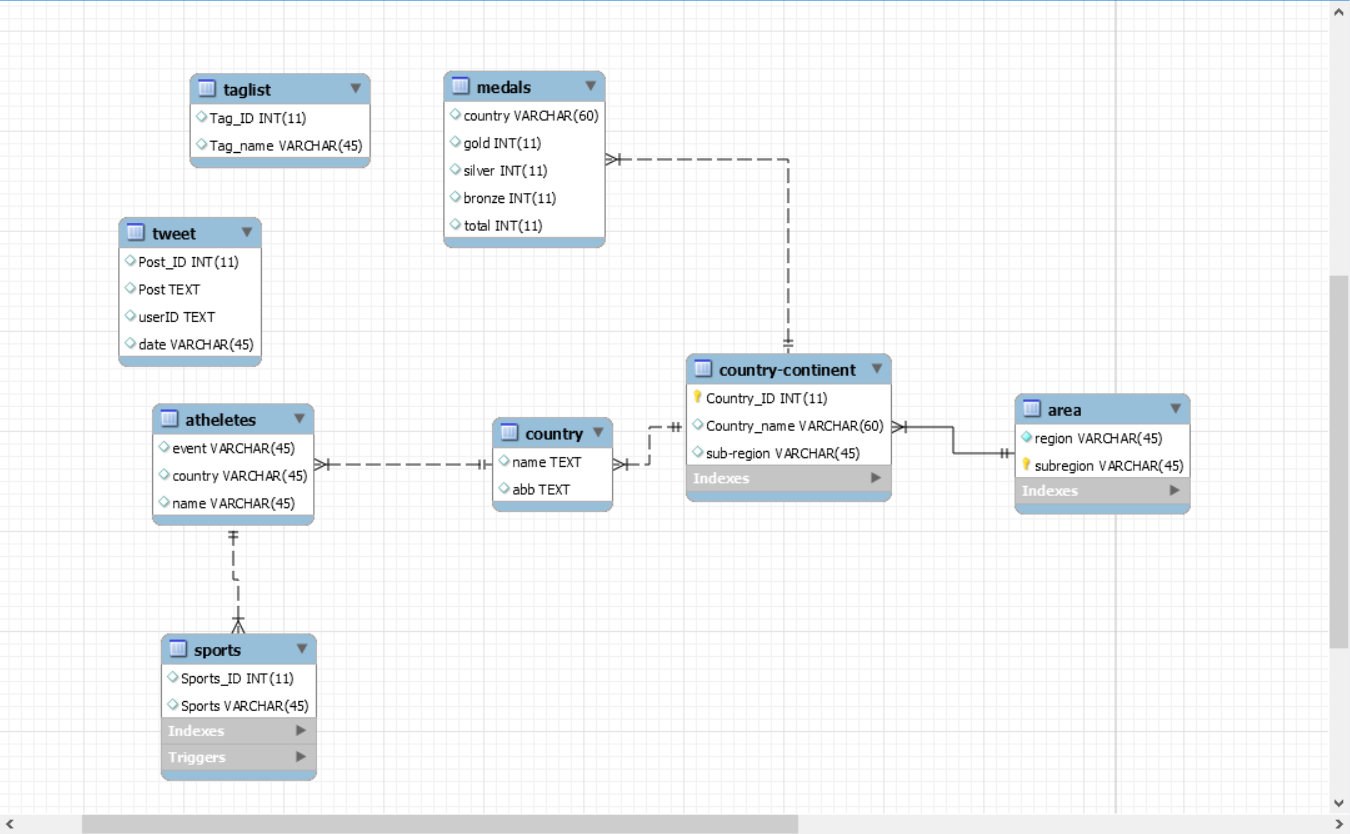

In [4]:
Image(filename="/Users/aoshuangzhang/Documents/Portfolio/ERD.jpg", width=900, height=900)

#### We just skip the steps of grabbing data ,using beatifulsoap and twitter API we can easily get datas and tweets 
#### here's some learning materials: https://developer.twitter.com/en/docs
#### We get mutiple datas saved in csv file ,and in MySQL workbench,there's a quick way to import these csv file and transfer them into database
#### i.first, import csv data into database:right click on the database we created and choose"table data import wizard" -->open our file source -->create a new table or insert into an exsiting table-->now you can see our tables created/inserted as shown:

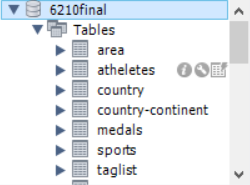

In [8]:
Image(filename="/Users/aoshuangzhang/Documents/Portfolio/alltables.jpg", width=300, height=300)

#### ii.another way to create table in MySql as shown in the picture below:   
#### For example: create aother Athelets table.

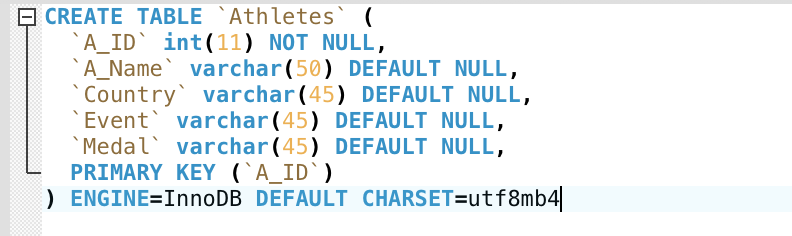

In [11]:
from IPython.display import Image
Image(filename="/Users/aoshuangzhang/Documents/Portfolio/Create.png", width=600, height=600)

#### After create all tables ,we have to clean our data(or you can do it before import into database by python,and it's woth mention that most of the data clean and transform works were done by python in our project)

#### Finally,we get a database in good design we have to use SQL to manipulate those datas,and for your convnient I'll just show you my code as below(note that I'm using pymysql in this notebook which can connect to my database and excute SQL query) 
#### In the below connection ,you can get host and port on your main page in workbench,mine lie below ,so my host is "localhost",port is"3306",user="root",and psd is your passwod.

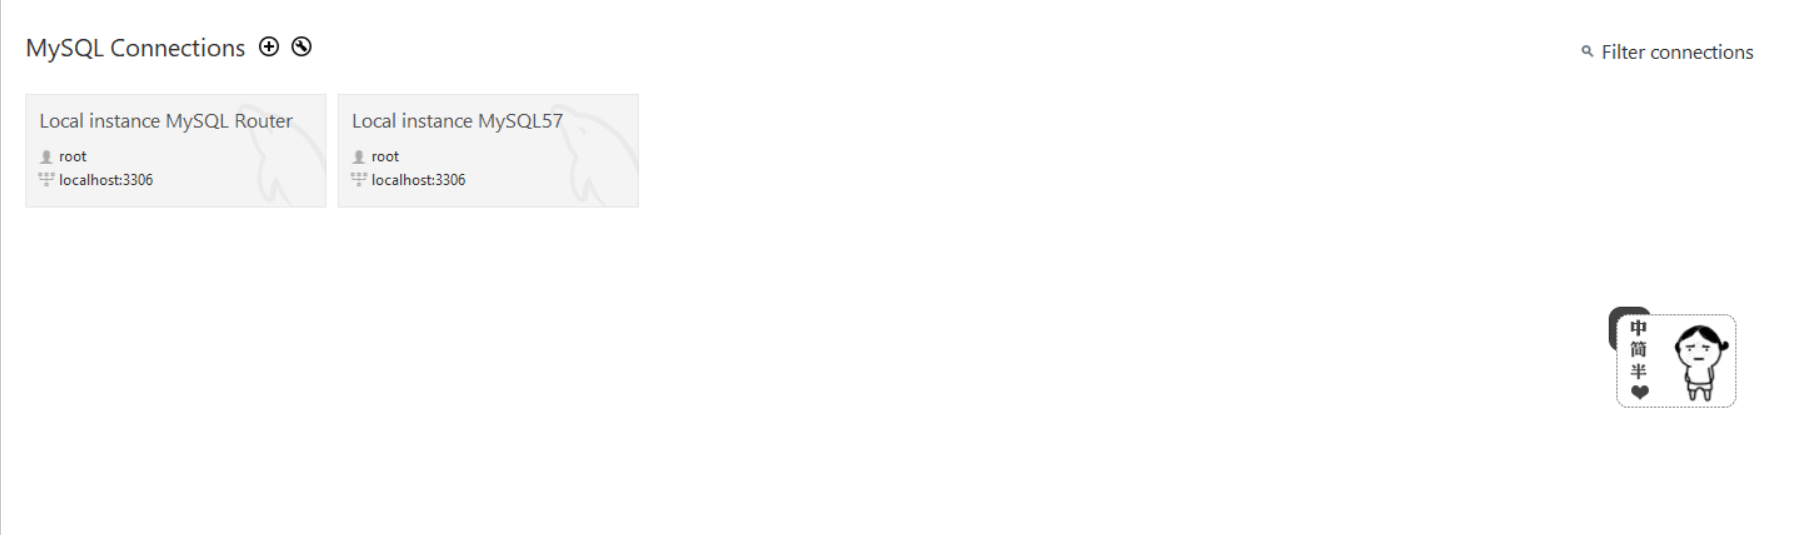

In [10]:
Image(filename="/Users/aoshuangzhang/Documents/Portfolio/connection.jpg", width=900, height=800)

#### Here we just retrieve all country name from 'country-continet' table,and the sentence in the cursor.execute() is just the same as SQL query in MySQL:

In [1]:
import pymysql
db = pymysql.connect(host="localhost", port=3306, user="root", passwd="380ssyasd123", db="6210final")
# prepare a cursor object using cursor() method
cursor = db.cursor()

# Q1 Select columns
#get all country name
cursor.execute("select Country_name from `country-continent`;")
for row in cursor:
    print(row)
cursor.execute("set profiling = on");

('Afghanistan',)
('Åland Islands',)
('Albania',)
('Algeria',)
('American Samoa',)
('Andorra',)
('Angola',)
('Anguilla',)
('Antarctica',)
('Antigua and Barbuda',)
('Argentina',)
('Armenia',)
('Aruba',)
('Australia',)
('Austria',)
('Azerbaijan',)
('Bahamas',)
('Bahrain',)
('Bangladesh',)
('Barbados',)
('Belarus',)
('Belgium',)
('Belize',)
('Benin',)
('Bermuda',)
('Bhutan',)
('Bolivia (Plurinational State of)',)
('Bonaire, Sint Eustatius and Saba',)
('Bosnia and Herzegovina',)
('Botswana',)
('Bouvet Island',)
('Brazil',)
('British Indian Ocean Territory',)
('Brunei Darussalam',)
('Bulgaria',)
('Burkina Faso',)
('Burundi',)
('Cambodia',)
('Cameroon',)
('Canada',)
('Cabo Verde',)
('Cayman Islands',)
('Central African Republic',)
('Chad',)
('Chile',)
('China',)
('Christmas Island',)
('Cocos (Keeling) Islands',)
('Colombia',)
('Comoros',)
('Congo',)
('Congo (Democratic Republic of the)',)
('Cook Islands',)
('Costa Rica',)
("Côte d'Ivoire",)
('Croatia',)
('Cuba',)
('Curaçao',)
('Cyprus',)
('Cz

C:\Users\yangd\venv\lib\site-packages\pymysql\cursors.py:165: Warning: (1287, "'@@profiling' is deprecated and will be removed in a future release.")
  result = self._query(query)


#### Conditional search and sort:

In [2]:
cursor.execute("select * from medals where total>5 order by gold;")
for row in cursor:
   print(row)

('Austria', 0, 2, 5, 7)
('Great Britain', 1, 4, 2, 7)
('Norway', 1, 3, 4, 8)
('Japan', 3, 4, 3, 10)
('Netherlands', 3, 3, 1, 7)
('Belarus', 4, 4, 4, 12)
('Slovakia', 6, 4, 1, 11)
('France', 7, 8, 5, 20)
('Germany', 7, 8, 4, 19)
('Ukraine', 7, 7, 8, 22)
('Canada', 8, 4, 16, 28)
('NPA', 8, 10, 6, 24)
('United States', 13, 15, 8, 36)


#### Select and filter some data from a table by join(this is because we want to get some datas invole two tables):

In [3]:
cursor.execute("select * from (select `country-continent`.Country_ID,Country_name,`sub-region`"
" from country inner join  `country-continent` where country.name="
"`country-continent`.Country_name) as countrytable where Country_ID<50 ;")
for row in cursor:
   print(row)

(1, 'Afghanistan', 'Southern Asia')
(3, 'Albania', 'Southern Europe')
(4, 'Algeria', 'Northern Africa')
(5, 'American Samoa', 'Polynesia')
(6, 'Andorra', 'Southern Europe')
(7, 'Angola', 'Middle Africa')
(8, 'Anguilla', 'Caribbean')
(9, 'Antarctica', 'null')
(10, 'Antigua and Barbuda', 'Caribbean')
(11, 'Argentina', 'South America')
(12, 'Armenia', 'Western Asia')
(13, 'Aruba', 'Caribbean')
(14, 'Australia', 'Australia and New Zealand')
(15, 'Austria', 'Western Europe')
(16, 'Azerbaijan', 'Western Asia')
(17, 'Bahamas', 'Caribbean')
(18, 'Bahrain', 'Western Asia')
(19, 'Bangladesh', 'Southern Asia')
(20, 'Barbados', 'Caribbean')
(21, 'Belarus', 'Eastern Europe')
(22, 'Belgium', 'Western Europe')
(23, 'Belize', 'Central America')
(24, 'Benin', 'Western Africa')
(25, 'Bermuda', 'Northern America')
(26, 'Bhutan', 'Southern Asia')
(27, 'Bolivia (Plurinational State of)', 'South America')
(28, 'Bonaire, Sint Eustatius and Saba', 'Caribbean')
(29, 'Bosnia and Herzegovina', 'Southern Europe')

#### So we just skip other steps ,you can start your own project now!

<DongjunYang,AoshaungZhang,JunheYao> is licensed under CC BY 3.0 https://creativecommons.org/licenses/by/3.0/us/\

<DongjunYang,AoshaungZhang,JunheYao> is licensed under the MIT License https://opensource.org/licenses/MIT